# Combinando dataframes

## Merge, join and concat

En muchas ocasiones los datos vienen en distintos archivos, y luego nosotros tendremos que unirlos para trabajarlos en un solo dataframe.

Para hacer esta union vamos a utilizar las funciones de pandas `merge`, `join` y `concat`

---

In [1]:
import pandas as pd

### `pd.concat()`

La concatenacion es basicamente pegar o unir Dataframes consecutivamente, ya sea sobre el axis=0 o sobre el axis=1

Podemos usar **pd.concat** y pasar una lista de Dataframes para concatenar.


In [2]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [3]:
df2 = pd.DataFrame({'A': ['A4', 'A5'],
                        'B': ['B4', 'B5'],
                        'C': ['C4', 'C5'],
                        'D': ['D4', 'D5']},
                         index=[4, 5]) 

In [4]:
df3 = pd.DataFrame({'A': ['A6', 'A7', 'A8', 'A9'],
                        'B': ['B6', 'B7', 'B8', 'B9'],
                        'C': ['C6', 'C7', 'C8', 'C9'],
                        'D': ['D6', 'D7', 'D8', 'D9']},
                        index=[6, 7, 8, 9])

In [6]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [7]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5


In [8]:
df3

,A,B,C,D
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [9]:
pd.concat([df1,df2,df3],axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [10]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A7,B7,C7,D7
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### `pd.merge()`

La funcion merge nos permite unir tablas a traves de los valores de una columna (o mas), a los que se denomina `keys` o identificadores. 

Para los que conocen SQL, esto es el metodo join en dicho lenguage.

In [2]:
df_left = pd.DataFrame({'key': ['K0', 'K1', 'K8', 'K9'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
df_right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [3]:
df_left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K8,A2,B2
3,K9,A3,B3


In [4]:
df_right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


**inner join** (en SQL)

Devuelve registros que tienen valores coincidentes en ambas tablas


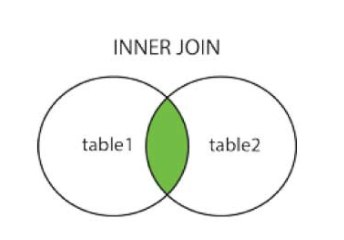

In [5]:
pd.merge(df_left,df_right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


In [10]:
# supongamos que las columnas se llaman de manera diferente en los dos dataframes
df_right.rename(columns={'key':'clave'}, inplace=True)

In [11]:
df_right

,clave,C,D
3,K3,C3,D3
2,K2,C2,D2
1,K1,C1,D1
0,K0,C0,D0


In [12]:
df_right.sort_values("clave",ascending=False,inplace=True)
df_right

,clave,C,D
3,K3,C3,D3
2,K2,C2,D2
1,K1,C1,D1
0,K0,C0,D0


In [13]:
pd.merge(df_left,df_right,how='inner',left_on='key',right_on='clave')

,key,A,B,clave,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1


**left join** (en SQL)

 Devuelve todos los registros de la tabla de la izquierda y los registros coincidentes de la tabla de la derecha 

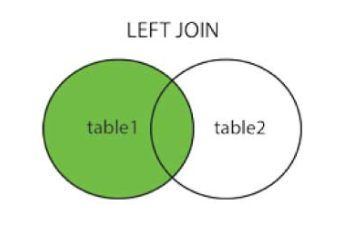

In [14]:
pd.merge(df_left,df_right,how='left',left_on='key',right_on='clave')

,key,A,B,clave,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K8,A2,B2,NaN,NaN,NaN
3,K9,A3,B3,NaN,NaN,NaN


Existen otras formas de combinar dataframes y que son muy utilizadas en el dia a dia, por favor lean el siguiente articulo para entender mas sobre el tema.

[tipos de join en sql](https://ingenieriadesoftware.es/tipos-sql-join-guia-referencia/)

[algunos ejemplos pandas](https://datacarpentry.org/python-ecology-lesson-es/05-merging-data/)

### `pd.join()`

Es un metodo conveniente para combinar los dataframes a traves de sus indices.


In [34]:
df_left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

df_right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [35]:
df_left.join(df_right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
